## Xử lý dữ liệu

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
import json
import csv
from nltk.tokenize import word_tokenize
import string
import re
import time
import pandas as pd


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Starting Preprocess Function

In [ ]:
tweets_data = []
x = []
y = []
k = []
some_milby = []
print("Starting Preprocess Function")

Starting Preprocess Function


Retrieving TXT File
1. Chức năng: Tải và đọc dữ liệu tweet từ một tệp JSON.
2. Quy trình:
- Mở tệp JSON chứa dữ liệu tweet.
- Đọc từng dòng trong tệp, chuyển đổi mỗi dòng từ dạng JSON sang đối tượng Python, sau đó lưu vào danh sách tweets_data.
- Khi hoàn tất, hàm này sẽ gọi hàm processdata() để xử lý văn bản của các tweet.

In [ ]:
def getdata(dataurl):
    print("Retrieving TXT File")
    tweets_data_path = dataurl
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
    print("Retrieving Successfull")
    time.sleep(3)
    processdata()

Hàm processdata():
1. Chức năng: Xử lý văn bản của các tweet.
2. Quy trình:
- Loại bỏ emoji khỏi văn bản của mỗi tweet bằng cách sử dụng biểu thức chính quy (regex).
- Loại bỏ các dấu câu khỏi văn bản.
- Lưu văn bản đã xử lý vào danh sách x và ID tweet vào danh sách k

In [ ]:
def processdata():
    print("Recovering Data Teets")
    time.sleep(1)
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    for i in range(len(tweets_data)):
        q = tweets_data[i]['text']
        o = tweets_data[i]['id_str']
        q = RE_EMOJI.sub(r'', q)
        i = q.translate(str.maketrans('','',string.punctuation))
        x.append(i)
        k.append(o)
    print("Data Tweets Recovered")

Hàm readdict(dataurl):
1. Chức năng: Đọc từ điển cảm xúc từ một tệp TSV (dữ liệu phân tách bởi tab).
2. Quy trình:
- Mở và đọc tệp TSV chứa từ và cảm xúc tương ứng.
- Lưu từng từ và cảm xúc tương ứng vào danh sách y.
- Sau khi hoàn tất, gọi hàm addpolarity() để tiếp tục phân tích cảm xúc của các tweet.

In [ ]:
def readdict(dataurl):
    print("Reading Dictionary")
    with open(dataurl) as tsvfile:
      reader = csv.reader(tsvfile, delimiter='\t')
      for row in reader:
          i = []
          i.append(row[2])
          i.append(row[5])
          y.append(i)
    print("Dictionary Preparation Done")
    addpolarity()

Save Output to xlsx

In [ ]:
def savetoxlsx():
    df = pd.DataFrame(some_milby)
    df.to_excel('./output.xlsx', header=("id","sentiment"), index=False)
    #file = open("testfile_data.txt","w")
    #file.write(some_milby)
    #file.close()
    print("===========================")
    print("Data Saved!")
    print("===========================")

Hàm addpolarity() thực hiện phân tích cảm xúc cho các tweet bằng cách so sánh các từ trong tweet với một từ điển cảm xúc và xác định cảm xúc tổng thể dựa trên sự xuất hiện của các từ đó. Hàm này rất quan trọng trong việc đánh giá cảm xúc của các tweet và giúp bạn có cái nhìn rõ hơn về dữ liệu của mình.

In [ ]:
def addpolarity():
    start_time = time.time()
    counter = 0
    print("===========================")
    print("Processing please wait...")
    print("===========================\n\n")
    for j in x:
        tweet_token = j
        token = word_tokenize(tweet_token)
        sumnum = 0
        sum_word = 0
        for t in token:
            for d in y:
                if t == d[0]:
                    sentiment = d[1]
                    if sentiment == "positive":
                        sumnum += 1
                        sum_word += 1
                    elif sentiment == "negative":
                        sumnum += -1
                        sum_word += 1
                    else:
                        sumnum += 0
                        sum_word += 1
                    break
        if sum_word != 0.0:
            sum_more = sumnum / sum_word
            if sum_more >= 0.2:
                sum_more = 1

            elif (sum_more < 0.2) and (sum_more > -0.5):
                sum_more = 0

            elif sum_more <= -0.5:
                sum_more = -1
            else:
                print("****")
        sum_var = []
        varid = k[counter]
        sum_var.append(varid)
        sum_var.append(sum_more)
        some_milby.append(sum_var)
        counter += 1
    print("Processing time: ", round((time.time() - start_time),8), "Seconds \n\n")
    time.sleep(3)
    print("===========================")
    print("Processing Finish")
    print("===========================")
    savetoxlsx()

In [ ]:
def runall():
    getdata('tweetdata.txt')
    readdict('dictionary.tsv')
runall()

Retrieving TXT File
Retrieving Successfull
Recovering Data Teets
Data Tweets Recovered
Reading Dictionary
Dictionary Preparation Done
Processing please wait...


Processing time:  86.9588232 Seconds 


Processing Finish
Data Saved!


Các biểu đồ thống kê cảm xúc trong dữ liệu dựa trên tweet của từng id

                   id  sentiment
0  870430762255953920         -1
1  870430770141253632         -1
2  870430771592413187         -1
3  870430772800479233         -1
4  870430776432644096          0


<ipython-input-9-f3fa7e89b1ba>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


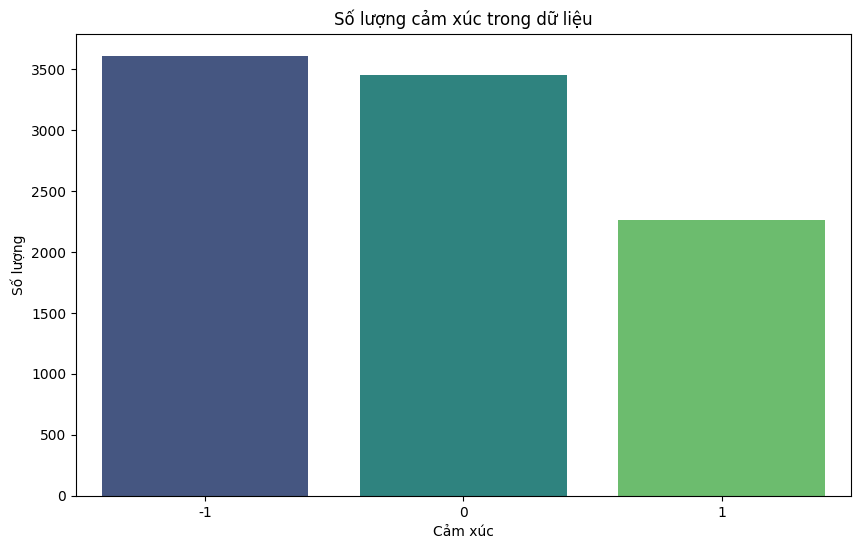

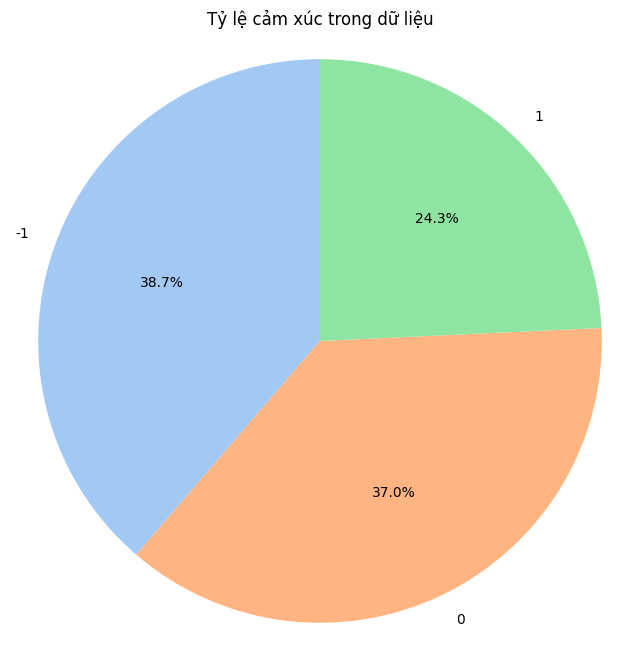

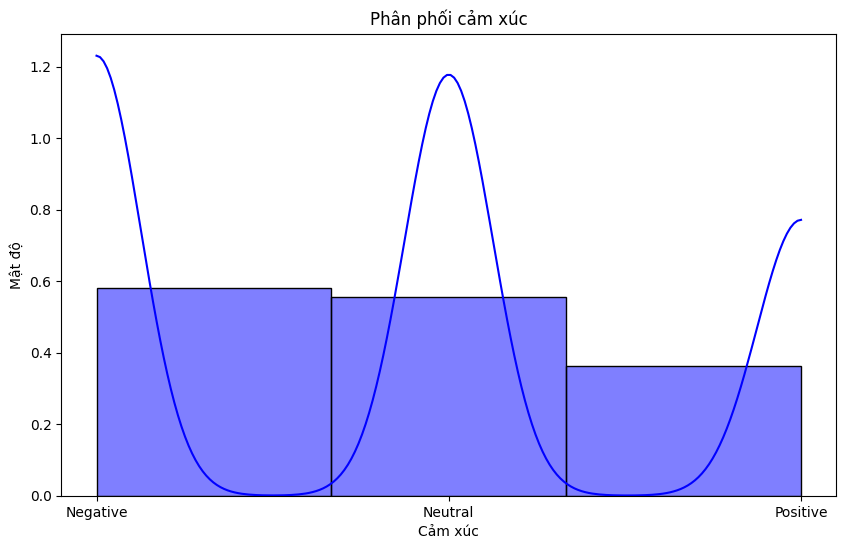

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file Excel
df = pd.read_excel('output.xlsx')

# Kiểm tra dữ liệu
print(df.head())

# Thống kê số lượng của mỗi loại cảm xúc
sentiment_counts = df['sentiment'].value_counts()

# Biểu đồ cột thể hiện số lượng cảm xúc
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Số lượng cảm xúc trong dữ liệu')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')
plt.show()

# Biểu đồ tròn thể hiện tỷ lệ cảm xúc
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Tỷ lệ cảm xúc trong dữ liệu')
plt.axis('equal')  # Để biểu đồ hình tròn
plt.show()

# Biểu đồ histogram để xem phân phối cảm xúc
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=3, kde=True, color='blue', stat='density', alpha=0.5)
plt.title('Phân phối cảm xúc')
plt.xlabel('Cảm xúc')
plt.ylabel('Mật độ')
plt.xticks(ticks=[-1, 0, 1], labels=['Negative', 'Neutral', 'Positive'])  # Chỉnh lại các nhãn
plt.show()

## Huấn luyện Model

In [ ]:
import json
import pandas as pd
import time
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
#from sklearn.metrics import roc_auc_score

In [ ]:
tweets_data = []
x = []
y = []
vectorizer = CountVectorizer(stop_words='english')

Hàm đọc File

In [ ]:
def retrieveTweet(data_url):

    tweets_data_path = data_url
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

Hàm này đọc một file Excel chứa thông tin về cảm xúc của các tweet (Pdata_url), sau đó duyệt qua dữ liệu này và so khớp id từ dữ liệu cảm xúc với id_str trong dữ liệu tweet.
Khi tìm thấy tweet phù hợp, nó thêm văn bản tweet vào x và nhãn cảm xúc vào y.

In [ ]:
def retrieveProcessedData(Pdata_url):
    sent = pd.read_excel(Pdata_url)
    for i in range(len(sent)):
        for tweet in tweets_data:
            if tweet['id_str'] == str(sent['id'][i]):
                x.append(tweet['text'])
                y.append(sent['sentiment'][i])
                break

Hàm này vẽ ma trận nhầm lẫn (confusion matrix) để trực quan hóa hiệu suất của mô hình phân loại.
Nó tùy chỉnh giao diện và định dạng của ma trận nhầm lẫn, hiển thị các giá trị dự đoán so với giá trị thực.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Cây quyết định (Decision Tree) là một phương pháp hữu ích trong việc huấn luyện các mô hình phân loại và hồi quy. Dưới đây là một số ứng dụng cụ thể:

Phân loại (Classification):

Cây quyết định được sử dụng rộng rãi để phân loại các loại dữ liệu. Ví dụ, trong phân tích văn bản, nó có thể phân loại cảm xúc của bài viết (tích cực, tiêu cực, trung tính) hoặc xác định loại chủ đề của một tweet.
Trong lĩnh vực y tế, cây quyết định có thể được sử dụng để phân loại bệnh nhân thành các nhóm dựa trên các triệu chứng và thông tin y tế.
Hồi quy (Regression):

Cây quyết định cũng có thể được sử dụng để dự đoán giá trị liên tục, chẳng hạn như dự đoán giá nhà dựa trên các yếu tố như diện tích, vị trí, và số phòng ngủ.
Dễ hiểu và trực quan:

Một trong những lợi thế lớn nhất của cây quyết định là khả năng trực quan hóa. Người dùng có thể dễ dàng theo dõi quá trình ra quyết định của mô hình qua các nhánh của cây, giúp giải thích và hiểu rõ hơn về cách mô hình đưa ra dự đoán.
Xử lý dữ liệu không đồng nhất:

Cây quyết định có thể xử lý dữ liệu không đồng nhất và không yêu cầu rằng dữ liệu phải được chuẩn hóa trước khi đưa vào mô hình.
Không cần nhiều điều kiện giả định:

So với các mô hình hồi quy tuyến tính, cây quyết định không yêu cầu giả định về phân phối dữ liệu, làm cho nó linh hoạt hơn trong nhiều tình huống thực tế.
Nhờ vào những đặc điểm trên, cây quyết định trở thành một công cụ phổ biến và mạnh mẽ trong việc phát triển các mô hình học máy trong nhiều lĩnh vực khác nhau.

_____________________________________________________________________________

Hàm datree() thực hiện phân loại dữ liệu văn bản sử dụng mô hình cây quyết định, một phương pháp phổ biến trong học máy. Hàm này bắt đầu bằng việc import thư viện tree từ sklearn và ghi lại thời gian bắt đầu thực hiện để đo lường thời gian hoàn thành. Sau đó, dữ liệu văn bản được vector hóa thành dạng mà mô hình có thể hiểu thông qua fit_transform, và nhãn thực tế được gán từ danh sách y. Dữ liệu kiểm tra cũng được vector hóa để sử dụng cho dự đoán.

Tiếp theo, hàm khởi tạo mô hình DecisionTreeClassifier, huấn luyện nó với dữ liệu và nhãn thực tế, sau đó sử dụng mô hình đã huấn luyện để dự đoán nhãn cho dữ liệu kiểm tra. Điểm ROC curve và diện tích dưới đường cong (AUC) được tính toán để đánh giá độ chính xác của mô hình. Hàm cũng tạo và vẽ ma trận nhầm lẫn, giúp phân tích kết quả dự đoán so với nhãn thực tế. Cuối cùng, độ chính xác của mô hình và thời gian hoàn thành được in ra để đánh giá hiệu suất tổng thể.

Decision tree Accuracy : 
 98.55668748040587 %
 Completion Speed 1.84332



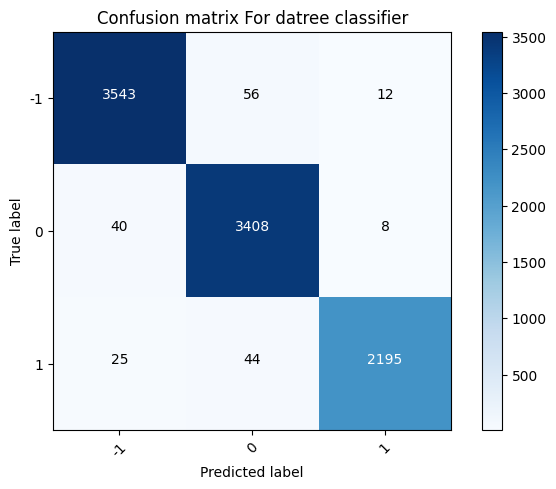

In [ ]:
def datree():
    from sklearn import tree
    start_timedt = time.time()
    train_featurestree = vectorizer.fit_transform(x)
    actual1 = y
    test_features1 = vectorizer.transform(x)
    dtree = tree.DecisionTreeClassifier()

    dtree = dtree.fit(train_featurestree, [int(r) for r in y])

    prediction1 = dtree.predict(test_features1)
    ddd, ttt, thresholds = metrics.roc_curve(actual1, prediction1, pos_label=1)
    dtreescore = format(metrics.auc(ddd, ttt))
    dtreescore = float(dtreescore)*100
    dtree_matrix = confusion_matrix(actual1, prediction1)
    plt.figure()
    plot_confusion_matrix(dtree_matrix, classes=[-1,0,1], title='Confusion matrix For datree classifier')
    print("Decision tree Accuracy : \n", dtreescore, "%")
    print(" Completion Speed", round((time.time() - start_timedt),5))
    print()
datree()

## DEMO

Hàm datreeINPUT: Hàm này nhận đầu vào là một tweet (inputtweet), sau đó vector hóa nó và dự đoán cảm xúc của tweet dựa trên mô hình cây quyết định đã huấn luyện.
Dự đoán cảm xúc được hiển thị dưới dạng "Positive", "Neutral", hoặc "Negative".

In [ ]:
def datreeINPUT(inputtweet):
    from sklearn import tree
    train_featurestree = vectorizer.fit_transform(x)
    dtree = tree.DecisionTreeClassifier()

    dtree = dtree.fit(train_featurestree, [int(r) for r in y])


    inputdtree= vectorizer.transform([inputtweet])
    predictt = dtree.predict(inputdtree)

    if predictt == 1:
        predictt = "Positive"
    elif predictt == 0:
        predictt = "Neutral"
    elif predictt == -1:
        predictt = "Negative"
    else:
        print("Nothing")

    print("\n*****************")
    print(predictt)
    print("*****************")


In [ ]:
def runall():
    retrieveTweet('./tweetdata.txt')
    retrieveProcessedData('./output.xlsx')

In [ ]:
runall()

print("\nInput your tweet : ")
inputtweet = input()

datreeINPUT(inputtweet)


Input your tweet : 
This is the worst customer service I’ve ever experienced. Absolutely unacceptable! I’m never shopping here again. #disappointed"

*****************
Negative
*****************


## HUẤN LUYỆN MODEL BẰNG CÁC THUẬT TOÁN KHÁC



Naive Bayes  Accuracy : 
 93.79406648429645 %
 Completion Speed 0.53422

Support vector machine Accuracy : 
 93.62738823407057 %
 Completion Speed 28.90218

Kneighborsclassifier Accuracy : 
 81.464022923447 %
 Completion Speed 5.64197

Random Forest Accuracy : 
 46.92481190883222 %
 Completion Speed 0.90165




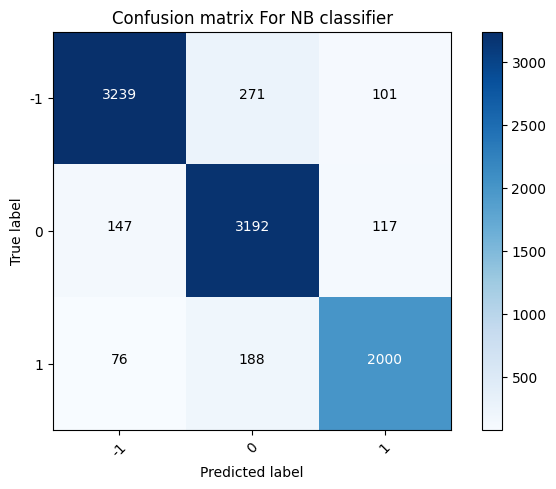

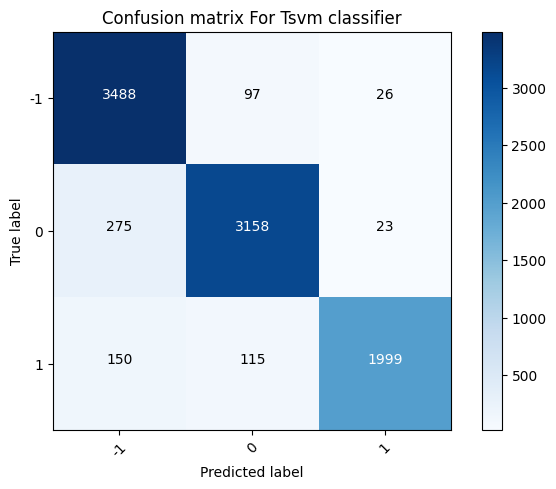

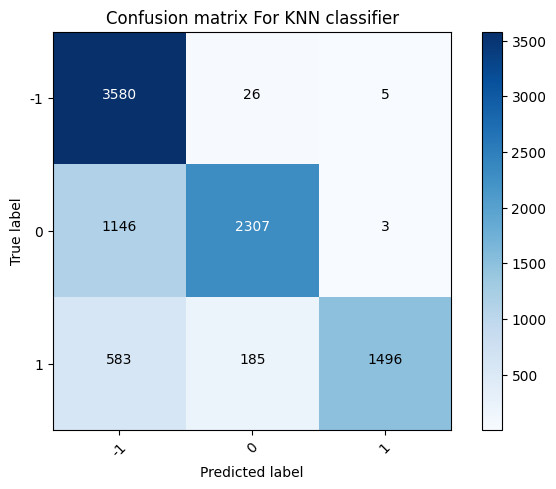

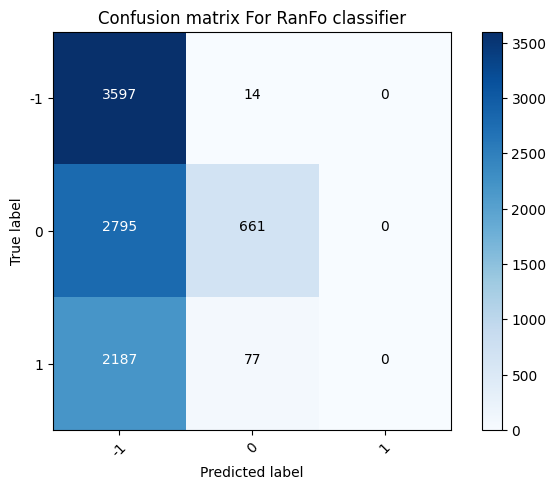

In [ ]:
def nbTrain():
    from sklearn.naive_bayes import MultinomialNB
    start_timenb = time.time()
    train_features = vectorizer.fit_transform(x)

    actual = y

    nb = MultinomialNB()
    nb.fit(train_features, [int(r) for r in y])

    test_features = vectorizer.transform(x)
    predictions = nb.predict(test_features)
    fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)
    nbscore = format(metrics.auc(fpr, tpr))
    nbscore = float(nbscore)*100

    nb_matrix = confusion_matrix(actual, predictions)
    plt.figure()
    plot_confusion_matrix(nb_matrix, classes=[-1,0,1], title='Confusion matrix For NB classifier')

    print("\n")

    print("Naive Bayes  Accuracy : \n", nbscore,"%")
    print(" Completion Speed", round((time.time() - start_timenb),5))
    print()

def Tsvm():
    from sklearn.svm import SVC
    start_timesvm = time.time()
    train_featuressvm = vectorizer.fit_transform(x)
    actual2 = y
    test_features2 = vectorizer.transform(x)
    svc = SVC()

    svc = svc.fit(train_featuressvm, [int(r) for r in y])
    prediction2 = svc.predict(test_features2)
    sss, vvv, thresholds = metrics.roc_curve(actual2, prediction2, pos_label=1)
    svc = format(metrics.auc(sss, vvv))
    svc = float(svc)*100

    svc_matrix = confusion_matrix(actual2, prediction2)
    plt.figure()
    plot_confusion_matrix(svc_matrix, classes=[-1,0,1], title='Confusion matrix For Tsvm classifier')

    print("Support vector machine Accuracy : \n", svc, "%")
    print(" Completion Speed", round((time.time() - start_timesvm),5))
    print()

def knN():
    from sklearn.neighbors import KNeighborsClassifier
    start_timekn = time.time()
    train_featureskn = vectorizer.fit_transform(x)
    actual3 = y
    test_features3 = vectorizer.transform(x)
    kn = KNeighborsClassifier(n_neighbors=2)


    kn = kn.fit(train_featureskn, [int(i) for i in y])
    prediction3 = kn.predict(test_features3)
    kkk, nnn, thresholds = metrics.roc_curve(actual3, prediction3, pos_label=1)
    kn = format(metrics.auc(kkk, nnn))
    kn = float(kn)*100

    knn_matrix = confusion_matrix(actual3, prediction3)
    plt.figure()
    plot_confusion_matrix(knn_matrix, classes=[-1,0,1], title='Confusion matrix For KNN classifier')


    print("Kneighborsclassifier Accuracy : \n", kn, "%")
    print(" Completion Speed", round((time.time() - start_timekn),5))
    print()

def RanFo():
    from sklearn.ensemble import RandomForestClassifier
    start_timerf = time.time()
    train_featuresrf = vectorizer.fit_transform(x)
    actual4 = y
    test_features4 = vectorizer.transform(x)
    rf = RandomForestClassifier(max_depth=2, random_state=0)


    rf = rf.fit(train_featuresrf, [int(i) for i in y])
    prediction4 = rf.predict(test_features4)
    rrr, fff, thresholds = metrics.roc_curve(actual4, prediction4, pos_label=1)
    kn = format(metrics.auc(rrr, fff))
    kn = float(kn)*100

    rf_matrix = confusion_matrix(actual4, prediction4)
    plt.figure()
    plot_confusion_matrix(rf_matrix, classes=[-1,0,1], title='Confusion matrix For RanFo classifier')

    print("Random Forest Accuracy : \n", kn, "%")
    print(" Completion Speed", round((time.time() - start_timerf),5))
    print()
    print()
nbTrain()
Tsvm()
knN()
RanFo()

In [ ]:
import os

# Tạo thư mục templates nếu chưa tồn tại
if not os.path.exists('templates'):
    os.makedirs('templates')

# Tạo file HTML
html_content = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sentiment Analysis Demo</title>
</head>
<body>
    <h1>Sentiment Analysis on Tweets</h1>
    <form method="POST">
        <label for="tweet">Enter your tweet:</label><br><br>
        <input type="text" id="tweet" name="tweet" required><br><br>
        <input type="submit" value="Analyze">
    </form>

    {% if prediction %}
        <h2>Prediction: {{ prediction }}</h2>
    {% endif %}
</body>
</html>
'''

# Ghi nội dung vào file index.html trong thư mục templates
with open('templates/index.html', 'w') as file:
    file.write(html_content)

print("File index.html đã được tạo!")


File index.html đã được tạo!


In [ ]:
from flask import Flask, request, jsonify, render_template
import json
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree

# Khởi tạo Flask app
app = Flask(__name__)

# Biến toàn cục để lưu trữ dữ liệu và mô hình
tweets_data = []
x = []
y = []
vectorizer = CountVectorizer(stop_words='english')

# Hàm lấy dữ liệu từ file tweet
def retrieveTweet(data_url):
    with open(data_url, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tweets_data.append(tweet)
            except:
                continue

# Hàm lấy dữ liệu đã xử lý
def retrieveProcessedData(Pdata_url):
    sent = pd.read_excel(Pdata_url)
    for i in range(len(sent)):
        for tweet in tweets_data:
            if tweet['id_str'] == str(sent['id'][i]):
                x.append(tweet['text'])
                y.append(sent['sentiment'][i])
                break

# Hàm để dự đoán cảm xúc của tweet
def datreeINPUT(inputtweet):
    train_featurestree = vectorizer.fit_transform(x)
    dtree = tree.DecisionTreeClassifier()
    dtree = dtree.fit(train_featurestree, [int(r) for r in y])
    inputdtree = vectorizer.transform([inputtweet])
    predictt = dtree.predict(inputdtree)

    if predictt == 1:
        return "Positive"
    elif predictt == 0:
        return "Neutral"
    elif predictt == -1:
        return "Negative"
    return "Unknown"

# Route chính để nhận dữ liệu từ form
@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        input_tweet = request.form['tweet']
        prediction = datreeINPUT([input_tweet])
        return render_template('index.html', prediction=prediction)
    return render_template('index.html')

# Chạy Flask app
if __name__ == "__main__":
    retrieveTweet('./tweetdata.txt')  # Đọc dữ liệu từ file
    retrieveProcessedData('./output.xlsx')  # Đọc dữ liệu đã xử lý
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
!ngrok authtoken 2nHjg0x2wlIMZsty7xfq9vwlTgq_5eGgokkTn4fH3xcpGvkmu

In [ ]:
!pip install pyngrok

from pyngrok import ngrok

# Khởi tạo ngrok để kết nối Flask app từ xa
public_url = ngrok.connect(5000)
print(f"Ngrok URL: {public_url}")

app.run()

